In [34]:
from random import gauss as gs
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import itertools

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [35]:
df = pd.read_csv('Data/Jamestown_weather_2002-current.csv', index_col="Date", parse_dates=True)

In [36]:
df.head()

,MaxTemp,MaxTempMissing,MaxTempEstimated,MinTemp,MinTempMissing,MinTempEstimated,AvgTemp,AvgTempMissing,AvgTempEstimated,AvgBareSoilTemp_F,...,AvgPenmanPETEstimated,TotalRainfall_inch,TotalRainfallMissing,TotalRainfallEstimated,AvgDewPoint_F,AvgDewPointMissing,AvgDewPointEstimated,AvgWindChill_F,AvgWindChillMissing,AvgWindChillEstimated
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,27.303,0,0,9.467,0,0,18.385,0,0,27.933,...,0,NaN,7,0,13.858,0,0,7.459,0,0
2002-01-08,39.815,0,0,25.948,0,0,32.882,0,0,31.238,...,0,NaN,7,0,25.456,0,0,23.226,0,0
2002-01-15,23.837,0,0,2.848,0,0,13.342,0,0,27.270,...,0,NaN,7,0,8.138,0,0,1.728,0,0
2002-01-22,21.085,0,0,3.847,0,0,12.466,0,0,24.517,...,0,NaN,7,0,6.820,0,0,-0.195,0,0
2002-01-29,19.566,0,0,-6.088,0,0,6.739,0,0,23.631,...,0,NaN,7,0,1.558,0,0,-3.079,0,0


In [37]:
df.describe()

,MaxTemp,MaxTempMissing,MaxTempEstimated,MinTemp,MinTempMissing,MinTempEstimated,AvgTemp,AvgTempMissing,AvgTempEstimated,AvgBareSoilTemp_F,...,AvgPenmanPETEstimated,TotalRainfall_inch,TotalRainfallMissing,TotalRainfallEstimated,AvgDewPoint_F,AvgDewPointMissing,AvgDewPointEstimated,AvgWindChill_F,AvgWindChillMissing,AvgWindChillEstimated
count,1145.000000,1145.0,1145.000000,1145.000000,1145.0,1145.000000,1145.000000,1145.0,1145.000000,1145.000000,...,1145.000000,709.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,52.011427,0.0,0.029694,30.617717,0.0,0.039301,41.314720,0.0,0.040175,47.079124,...,0.001747,0.538072,2.779913,0.047162,32.574510,0.000873,0.053275,35.287160,0.000873,0.120524
std,23.982678,0.0,0.319788,21.321530,0.0,0.343816,22.536766,0.0,0.344984,17.618752,...,0.041776,0.807818,3.383234,0.425841,20.498662,0.029553,0.376019,28.037747,0.029553,0.592322
min,-6.841000,0.0,0.000000,-24.039000,0.0,0.000000,-15.440000,0.0,0.000000,17.738000,...,0.000000,0.000000,0.000000,0.000000,-23.987000,0.000000,0.000000,-34.988000,0.000000,0.000000
25%,31.172000,0.0,0.000000,14.233000,0.0,0.000000,23.063000,0.0,0.000000,31.019000,...,0.000000,0.024000,0.000000,0.000000,17.918000,0.000000,0.000000,12.845000,0.000000,0.000000
50%,55.395000,0.0,0.000000,31.627000,0.0,0.000000,43.737000,0.0,0.000000,43.522000,...,0.000000,0.223000,0.000000,0.000000,32.173000,0.000000,0.000000,38.237000,0.000000,0.000000
75%,74.249000,0.0,0.000000,50.753000,0.0,0.000000,62.393000,0.0,0.000000,64.262000,...,0.000000,0.741000,7.000000,0.000000,52.095000,0.000000,0.000000,62.088000,0.000000,0.000000
max,94.946000,0.0,7.000000,64.421000,0.0,7.000000,77.270000,0.0,7.000000,81.941000,...,1.000000,8.004000,7.000000,7.000000,67.721000,1.000000,7.000000,77.464000,1.000000,7.000000


In [38]:
df.isna().sum()

MaxTemp                       0
MaxTempMissing                0
MaxTempEstimated              0
MinTemp                       0
MinTempMissing                0
MinTempEstimated              0
AvgTemp                       0
AvgTempMissing                0
AvgTempEstimated              0
AvgBareSoilTemp_F             0
AvgBareSoilTempMissing        0
AvgBareSoilTempEstimated      0
AvgTurfSoilTemp_F             0
AvgTurfSoilTempMissing        0
AvgTurfSoilTempEstimated      0
AvgWindSpeed                  0
AvgWindSpeedMissing           0
AvgWindSpeedEstimated         0
MaxWindSpeed                  0
MaxWindSpeedMissing           0
MaxWindSpeedEstimated         0
TotalSolarRad_Lys             0
TotalSolarRadMissing          0
TotalSolarRadEstimated        0
TotalPenmanPET_inch           0
TotalPenmanPETMissing         0
TotalPenmanPETEstimated       0
AvgPenmanPET_inch             0
AvgPenmanPETMissing           0
AvgPenmanPETEstimated         0
TotalRainfall_inch          436
TotalRai

In [39]:
df.sum()

MaxTemp                      59553.084
MaxTempMissing                   0.000
MaxTempEstimated                34.000
MinTemp                      35057.286
MinTempMissing                   0.000
MinTempEstimated                45.000
AvgTemp                      47305.354
AvgTempMissing                   0.000
AvgTempEstimated                46.000
AvgBareSoilTemp_F            53905.597
AvgBareSoilTempMissing           0.000
AvgBareSoilTempEstimated        73.000
AvgTurfSoilTemp_F            51640.836
AvgTurfSoilTempMissing           1.000
AvgTurfSoilTempEstimated       186.000
AvgWindSpeed                 11091.380
AvgWindSpeedMissing              0.000
AvgWindSpeedEstimated          126.000
MaxWindSpeed                 27494.377
MaxWindSpeedMissing              0.000
MaxWindSpeedEstimated           99.000
TotalSolarRad_Lys           376892.506
TotalSolarRadMissing             0.000
TotalSolarRadEstimated          57.000
TotalPenmanPET_inch           1090.718
TotalPenmanPETMissing    

In [40]:
df_temps = df[["MaxTemp", "MaxTempMissing", "MaxTempEstimated", "MinTemp", "MinTempMissing", "MinTempEstimated", "AvgTemp", "AvgTempMissing", "AvgTempEstimated", "AvgBareSoilTemp_F", "AvgBareSoilTempMissing", "AvgBareSoilTempEstimated", "AvgTurfSoilTemp_F", "AvgTurfSoilTempMissing", "AvgTurfSoilTempEstimated"]]

In [41]:
df_temps.head()

,MaxTemp,MaxTempMissing,MaxTempEstimated,MinTemp,MinTempMissing,MinTempEstimated,AvgTemp,AvgTempMissing,AvgTempEstimated,AvgBareSoilTemp_F,AvgBareSoilTempMissing,AvgBareSoilTempEstimated,AvgTurfSoilTemp_F,AvgTurfSoilTempMissing,AvgTurfSoilTempEstimated
Date,,,,,,,,,,,,,,,
2002-01-01,27.303,0,0,9.467,0,0,18.385,0,0,27.933,0,0,29.125,0,0
2002-01-08,39.815,0,0,25.948,0,0,32.882,0,0,31.238,0,0,31.925,0,0
2002-01-15,23.837,0,0,2.848,0,0,13.342,0,0,27.270,0,0,29.438,0,0
2002-01-22,21.085,0,0,3.847,0,0,12.466,0,0,24.517,0,0,27.567,0,0
2002-01-29,19.566,0,0,-6.088,0,0,6.739,0,0,23.631,0,0,24.934,0,0


In [42]:
df_temps.sum()

MaxTemp                     59553.084
MaxTempMissing                  0.000
MaxTempEstimated               34.000
MinTemp                     35057.286
MinTempMissing                  0.000
MinTempEstimated               45.000
AvgTemp                     47305.354
AvgTempMissing                  0.000
AvgTempEstimated               46.000
AvgBareSoilTemp_F           53905.597
AvgBareSoilTempMissing          0.000
AvgBareSoilTempEstimated       73.000
AvgTurfSoilTemp_F           51640.836
AvgTurfSoilTempMissing          1.000
AvgTurfSoilTempEstimated      186.000
dtype: float64

In [43]:
df_temps[df_temps["AvgTurfSoilTempMissing"]==1]

,MaxTemp,MaxTempMissing,MaxTempEstimated,MinTemp,MinTempMissing,MinTempEstimated,AvgTemp,AvgTempMissing,AvgTempEstimated,AvgBareSoilTemp_F,AvgBareSoilTempMissing,AvgBareSoilTempEstimated,AvgTurfSoilTemp_F,AvgTurfSoilTempMissing,AvgTurfSoilTempEstimated
Date,,,,,,,,,,,,,,,
2005-08-02,85.172,0,0,57.475,0,0,71.324,0,0,73.666,0,0,67.224,1,0


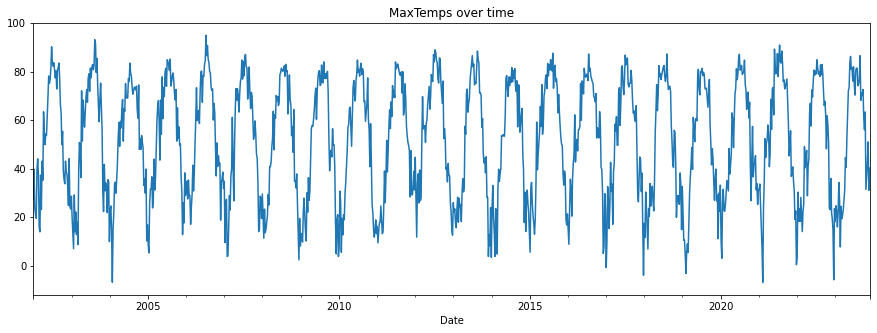

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["MaxTemp"].plot(ax=ax)
ax.set_title("MaxTemps over time");

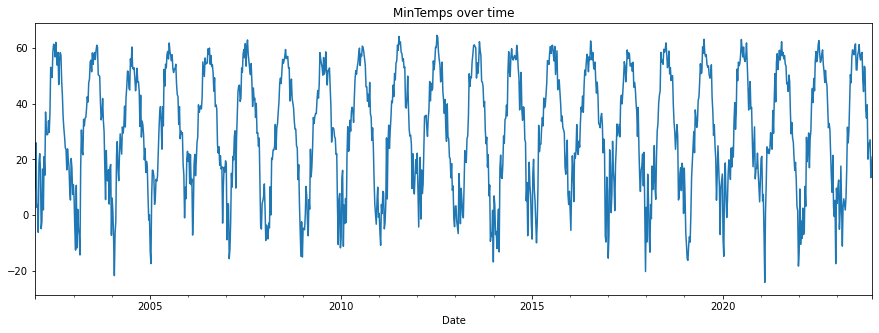

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["MinTemp"].plot(ax=ax)
ax.set_title("MinTemps over time");

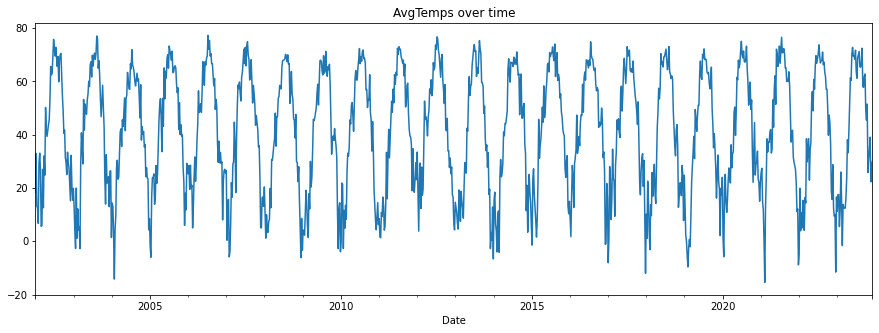

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["AvgTemp"].plot(ax=ax)
ax.set_title("AvgTemps over time");

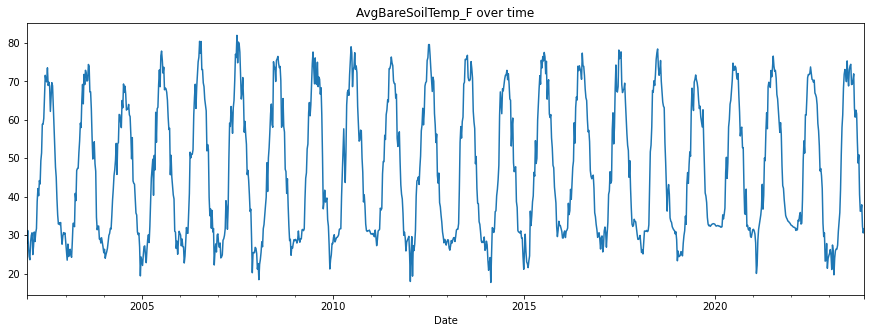

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["AvgBareSoilTemp_F"].plot(ax=ax)
ax.set_title("AvgBareSoilTemp_F over time");

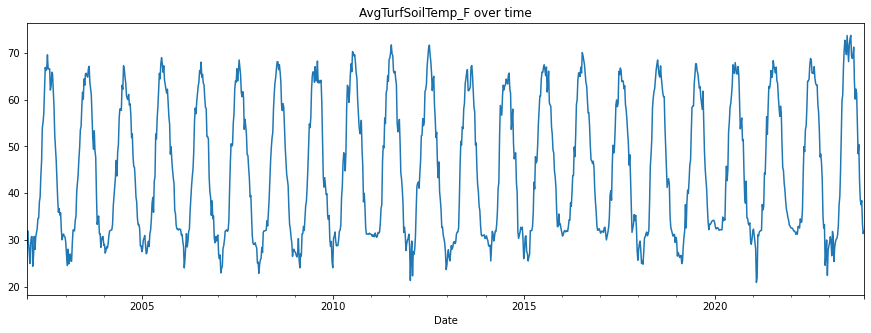

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["AvgTurfSoilTemp_F"].plot(ax=ax)
ax.set_title("AvgTurfSoilTemp_F over time");

In [49]:
df_num = df_temps[["MaxTemp", "MinTemp", "AvgTemp", "AvgBareSoilTemp_F", "AvgTurfSoilTemp_F"]]

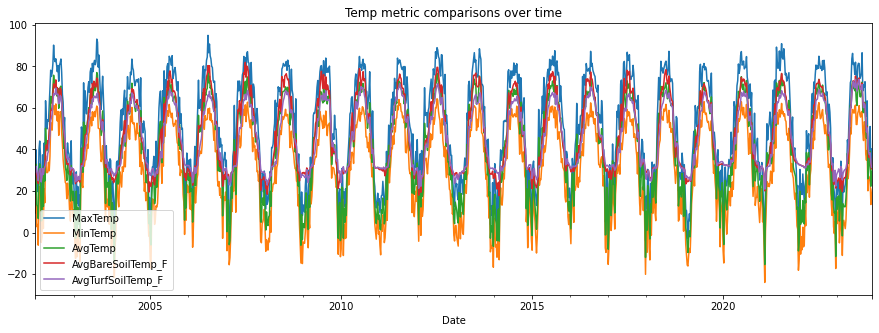

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))
df_num.plot(ax=ax)
ax.set_title("Temp metric comparisons over time");

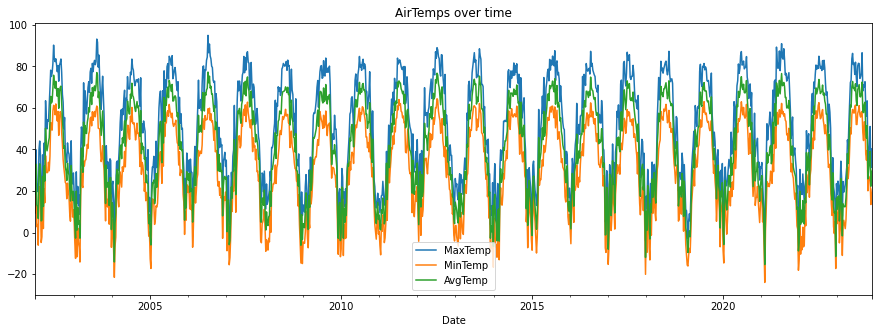

In [51]:
fig, ax = plt.subplots(figsize=(15, 5))
df_num[["MaxTemp", "MinTemp", "AvgTemp"]].plot(ax=ax)
ax.set_title("AirTemps over time");

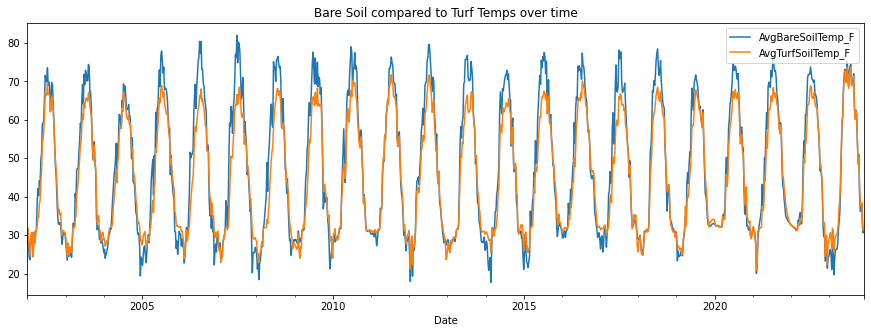

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
df_num[["AvgBareSoilTemp_F", "AvgTurfSoilTemp_F"]].plot(ax=ax)
ax.set_title("Bare Soil compared to Turf Temps over time");

Growing degree day (GDD) accumulations, rather than calendar days, more precisely characterize the length of the growing season. Unlike the number of days between killing frosts, GGDs provide quantitative information about temperature during the growing season. In calculating GDDs for corn, temperatures from a lower limit of 50 degrees and an upper limit of 86 degrees are accumulated for the growing season by applying the formula below to each day’s maximum and minimum temperatures:

Corn GDD=(Maximum temperature + minimum temperature)/2 - 50

Maximum temperatures higher than 86 degrees are entered as 86 and temperatures below 50 degrees are entered as 50 in the formula. GDDs are accumulated from seedling emergence until physiological maturity. Historical and current season GGD accumulations can be obtained from the North Dakota State University NDAWN weather site at https://ndawn.ndsu.nodak.edu/corn-growing-degree-days.html.

GDD accumulations (normal values) for May 1 to Oct. 1

In [53]:
df_num["GDD"] = (df["MaxTemp"]+df["MinTemp"])/2 - 50

<ipython-input-53-e56d78ba13f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["GDD"] = (df["MaxTemp"]+df["MinTemp"])/2 - 50


In [54]:
df_num.head()

,MaxTemp,MinTemp,AvgTemp,AvgBareSoilTemp_F,AvgTurfSoilTemp_F,GDD
Date,,,,,,
2002-01-01,27.303,9.467,18.385,27.933,29.125,-31.6150
2002-01-08,39.815,25.948,32.882,31.238,31.925,-17.1185
2002-01-15,23.837,2.848,13.342,27.270,29.438,-36.6575
2002-01-22,21.085,3.847,12.466,24.517,27.567,-37.5340
2002-01-29,19.566,-6.088,6.739,23.631,24.934,-43.2610


In [55]:
df_num["GDD"] = df_num["GDD"].clip(lower=0)

<ipython-input-55-88858dd19768>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["GDD"] = df_num["GDD"].clip(lower=0)


In [56]:
df_num.head()

,MaxTemp,MinTemp,AvgTemp,AvgBareSoilTemp_F,AvgTurfSoilTemp_F,GDD
Date,,,,,,
2002-01-01,27.303,9.467,18.385,27.933,29.125,0.0
2002-01-08,39.815,25.948,32.882,31.238,31.925,0.0
2002-01-15,23.837,2.848,13.342,27.270,29.438,0.0
2002-01-22,21.085,3.847,12.466,24.517,27.567,0.0
2002-01-29,19.566,-6.088,6.739,23.631,24.934,0.0


In [57]:
df_num[30:35]

,MaxTemp,MinTemp,AvgTemp,AvgBareSoilTemp_F,AvgTurfSoilTemp_F,GDD
Date,,,,,,
2002-07-30,77.465,53.720,65.593,69.761,66.594,15.5925
2002-08-06,80.312,58.342,69.327,68.760,66.611,19.3270
2002-08-13,72.868,46.791,59.830,62.178,62.045,9.8295
2002-08-20,80.582,55.302,67.942,65.711,62.868,17.9420
2002-08-27,81.677,58.208,69.943,69.651,65.870,19.9425


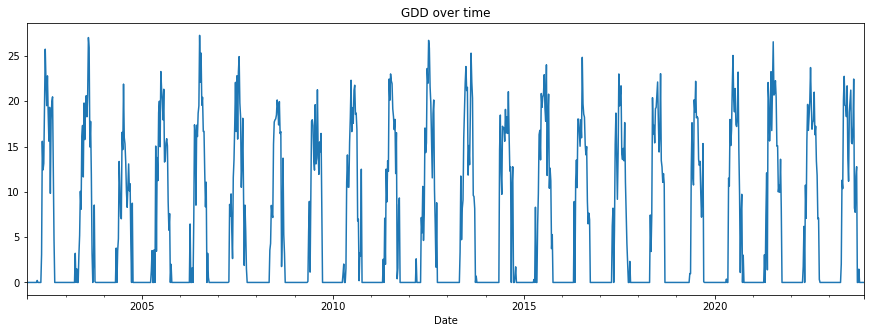

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
df_num["GDD"].plot(ax=ax)
ax.set_title("GDD over time");

In [59]:
dftest = adfuller(df_num["MaxTemp"])

In [60]:
print ('Results of Dickey-Fuller Test on MaxTemp:')

dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic', 'p-value', '#Lags Used',
                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test on MaxTemp:
Test Statistic                -1.517332e+01
p-value                        6.345724e-28
#Lags Used                     2.200000e+01
Number of Observations Used    1.122000e+03
Critical Value (1%)           -3.436192e+00
Critical Value (5%)           -2.864119e+00
Critical Value (10%)          -2.568143e+00
dtype: float64


In [61]:
dftest = adfuller(df_num["MinTemp"])

In [62]:
print ('Results of Dickey-Fuller Test on MinTemp:')

dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic', 'p-value', '#Lags Used',
                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test on MinTemp:
Test Statistic                -1.520512e+01
p-value                        5.756984e-28
#Lags Used                     2.300000e+01
Number of Observations Used    1.121000e+03
Critical Value (1%)           -3.436197e+00
Critical Value (5%)           -2.864122e+00
Critical Value (10%)          -2.568145e+00
dtype: float64


In [63]:
dftest = adfuller(df_num["GDD"])

In [64]:
print ('Results of Dickey-Fuller Test on GDD:')

dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic', 'p-value', '#Lags Used',
                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test on GDD:
Test Statistic                -1.098280e+01
p-value                        7.385757e-20
#Lags Used                     2.300000e+01
Number of Observations Used    1.121000e+03
Critical Value (1%)           -3.436197e+00
Critical Value (5%)           -2.864122e+00
Critical Value (10%)          -2.568145e+00
dtype: float64


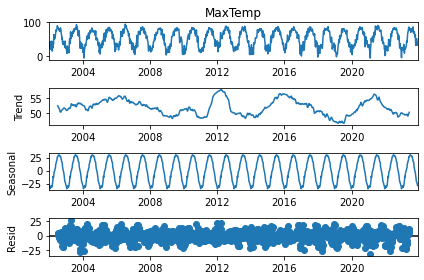

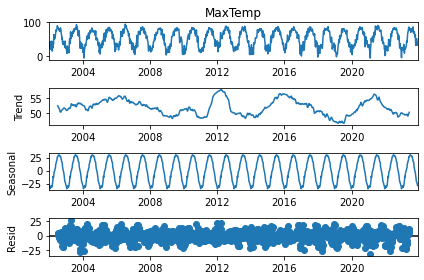

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_num["MaxTemp"])
result.plot()

In [66]:
df = pd.DataFrame(np.hstack((df_num["MaxTemp"].values.reshape(-1, 1),
                       df_num["MaxTemp"].shift().values.reshape(-1, 1),
                       df_num["MaxTemp"].shift(periods=2).values.reshape(-1, 1))),
             columns=['orig', 'shifted_one_period', 'shifted_two_periods'])
df.head()

,orig,shifted_one_period,shifted_two_periods
0,27.303,NaN,NaN
1,39.815,27.303,NaN
2,23.837,39.815,27.303
3,21.085,23.837,39.815
4,19.566,21.085,23.837


In [67]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df['orig'][1:], df['shifted_one_period'][1:]))


9.980344959537401

In [68]:
np.sqrt(mean_squared_error(df['orig'][2:], df['shifted_two_periods'][2:]))

12.39234901792139

## Max Temps

In [95]:
df_max = df_num["MaxTemp"]

In [96]:
cutoff = round(df_max.shape[0]*0.8)
cutoff

916

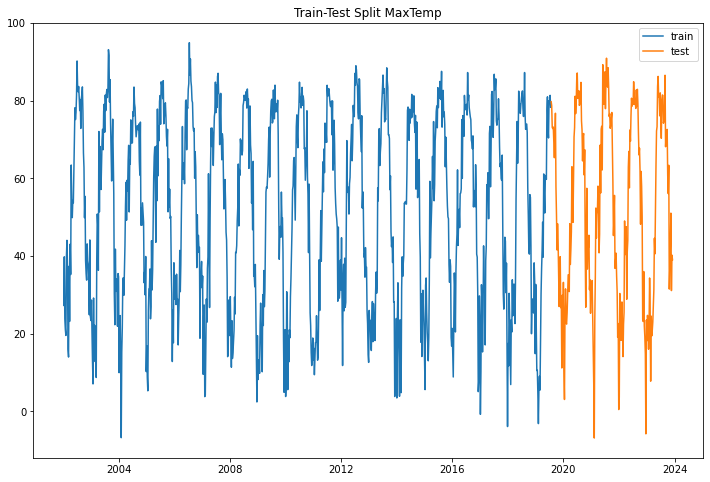

In [97]:
trainM = df_max[:cutoff]

testM = df_max[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(trainM, label='train')
ax.plot(testM, label='test')
ax.set_title('Train-Test Split MaxTemp');
plt.legend();

In [98]:
trainM

Date
2002-01-01    27.303
2002-01-08    39.815
2002-01-15    23.837
2002-01-22    21.085
2002-01-29    19.566
               ...  
2019-06-18    70.417
2019-06-25    80.034
2019-07-02    79.628
2019-07-09    81.387
2019-07-16    78.324
Name: MaxTemp, Length: 916, dtype: float64

In [102]:
naiveM = trainM.shift(1)
naiveM

Date
2002-01-01       NaN
2002-01-08    27.303
2002-01-15    39.815
2002-01-22    23.837
2002-01-29    21.085
               ...  
2019-06-18    72.868
2019-06-25    70.417
2019-07-02    80.034
2019-07-09    79.628
2019-07-16    81.387
Name: MaxTemp, Length: 916, dtype: float64

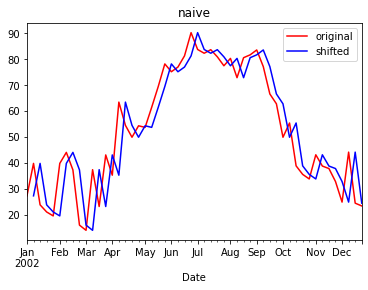

In [103]:
fig, ax = plt.subplots()

trainM[0:52].plot(ax=ax, c='r', label='original')
naiveM[0:52].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [104]:
np.sqrt(mean_squared_error(trainM[1:], naiveM.dropna()))

9.942815983950943

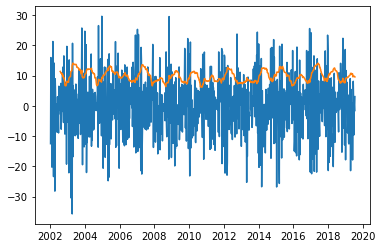

In [105]:
fig, ax = plt.subplots()
residuals = naiveM[1:] - trainM[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

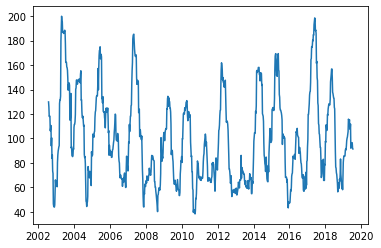

In [106]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(30).var());

In [109]:
p_val = adfuller(trainM.diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 1.5214898068086198e-17,
 so we can safely assume that the differenced data is stationary.


## Min Temps

In [110]:
df_min = df_num["MinTemp"]

In [111]:
cutoff = round(df_min.shape[0]*0.8)
cutoff

916

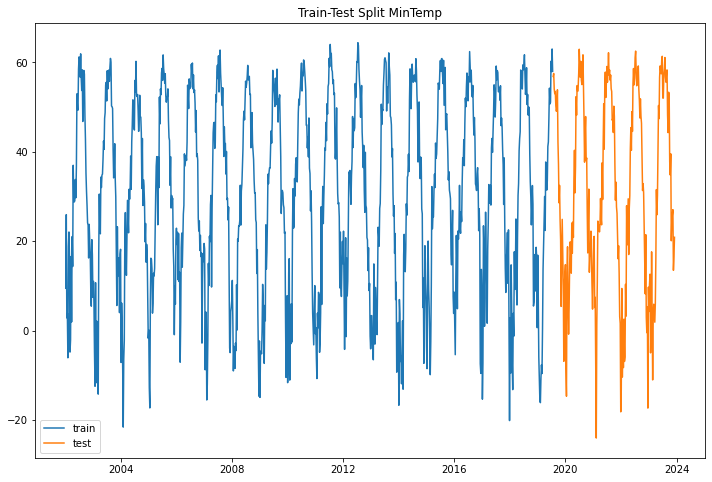

In [113]:
trainm = df_min[:cutoff]

testm = df_min[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(trainm, label='train')
ax.plot(testm, label='test')
ax.set_title('Train-Test Split MinTemp');
plt.legend();

In [114]:
trainm

Date
2002-01-01     9.467
2002-01-08    25.948
2002-01-15     2.848
2002-01-22     3.847
2002-01-29    -6.088
               ...  
2019-06-18    51.093
2019-06-25    60.288
2019-07-02    57.964
2019-07-09    63.014
2019-07-16    58.005
Name: MinTemp, Length: 916, dtype: float64

In [115]:
naivem = trainm.shift(1)
naivem

Date
2002-01-01       NaN
2002-01-08     9.467
2002-01-15    25.948
2002-01-22     2.848
2002-01-29     3.847
               ...  
2019-06-18    50.718
2019-06-25    51.093
2019-07-02    60.288
2019-07-09    57.964
2019-07-16    63.014
Name: MinTemp, Length: 916, dtype: float64

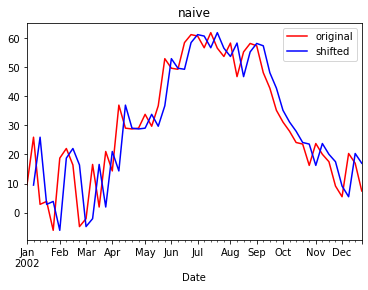

In [116]:
fig, ax = plt.subplots()

trainm[0:52].plot(ax=ax, c='r', label='original')
naivem[0:52].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [117]:
np.sqrt(mean_squared_error(trainm[1:], naivem.dropna()))

8.550515831561997

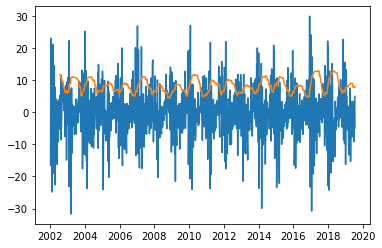

In [118]:
fig, ax = plt.subplots()
residuals = naivem[1:] - trainm[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

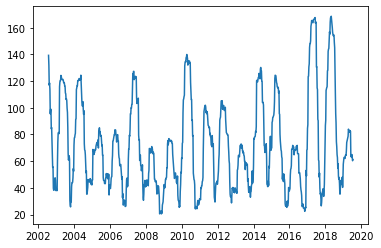

In [119]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(30).var());

In [120]:
p_val = adfuller(trainm.diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 2.96622227361988e-19,
 so we can safely assume that the differenced data is stationary.
